<a href="https://colab.research.google.com/github/Rajatvs/ML-2/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=bf04d79c0e701c8ae7508532b7c996a37217b396964113a0c691166dc7e0434f
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom
Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

Training SOM... please wait...
Training complete!


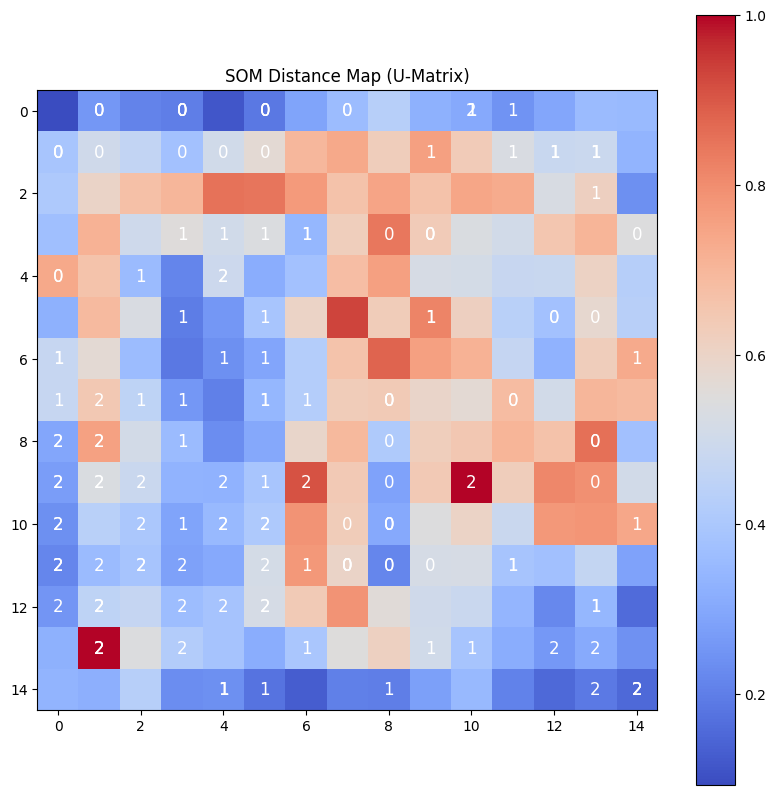


BMU (Best Matching Unit) Assignments:
   label  bmu_x  bmu_y
0      0      3      0
1      0      7     11
2      0      8     10
3      0      1      1
4      0      0      4


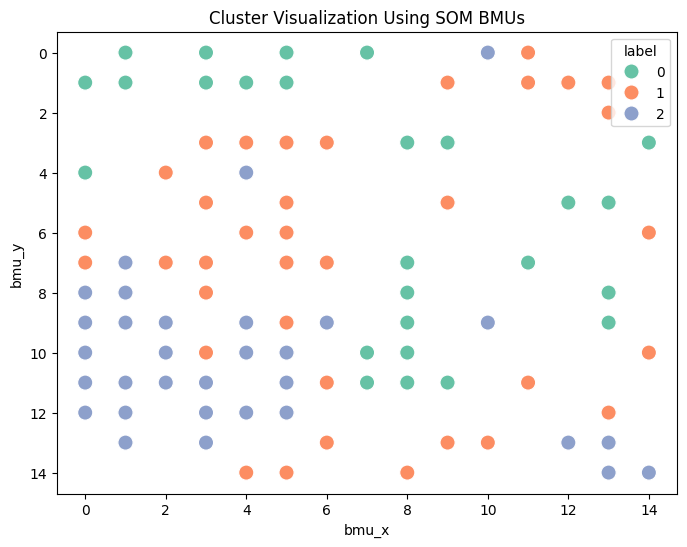

In [1]:
# =======================================================
# ALL-IN-ONE: Self-Organizing Map (SOM) - Unsupervised ML
# Works in Google Colab
# =======================================================

# Install SOM library
!pip install minisom numpy pandas matplotlib seaborn scikit-learn

import numpy as np
import pandas as pd
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------
# 1. Load Dataset (Iris dataset)
# (You can replace with your own data)
# ------------------------------------------
data = load_iris()
X = data.data
labels = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['label'] = labels

print("Dataset Preview:")
print(df.head())

# ------------------------------------------
# 2. DATA NORMALIZATION
# ------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------
# 3. BUILD AND TRAIN THE SOM
# ------------------------------------------
som_size = 15  # 15x15 grid
som = MiniSom(x=som_size, y=som_size, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)

som.random_weights_init(X_scaled)
print("\nTraining SOM... please wait...")
som.train_random(X_scaled, 1000)  # number of iterations

print("Training complete!")

# ------------------------------------------
# 4. VISUALIZE SOM DISTANCE MAP (U-MATRIX)
# ------------------------------------------
plt.figure(figsize=(10, 10))
plt.title("SOM Distance Map (U-Matrix)")

u_matrix = som.distance_map().T
plt.imshow(u_matrix, cmap='coolwarm')
plt.colorbar()

# Plot data points on map
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.text(w[0], w[1], str(labels[i]),
             ha='center', va='center', color='white', fontsize=12)

plt.show()

# ------------------------------------------
# 5. CLUSTER EACH DATA POINT (Assign BMUs)
# ------------------------------------------
bmus = np.array([som.winner(x) for x in X_scaled])
df['bmu_x'] = bmus[:, 0]
df['bmu_y'] = bmus[:, 1]

print("\nBMU (Best Matching Unit) Assignments:")
print(df[['label', 'bmu_x', 'bmu_y']].head())

# ------------------------------------------
# 6. SOM CLUSTER VISUALIZATION SCATTER PLOT
# ------------------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmu_x', y='bmu_y', hue='label', data=df, palette='Set2', s=120)
plt.title("Cluster Visualization Using SOM BMUs")
plt.gca().invert_yaxis()
plt.show()
